# 머신러닝 분류
1) 지도학습 -> 분류문제
2) 비지도 학습 -> 군집문제
3) 강화 학습
-> 여기서는 분류 문제를 다룬다.
## 분류 알고리즘 종류
1. 베이즈 통계(Bayes)와 나이브 베이즈(Naive Bayes)
2. 로지스틱 회귀(Logistic Regression)
3. 결정트리(Decision Tree)
4. 서포트 베거 머신(svm= Support Vector Machine)
5. 최소 근접 알고리즘(k-nn, Nearest Neighbor)
6. 심층 신경망 알고리즘(dnn, Neural Network)
7. 서로 다른 알고리즘의 결합(앙상블, Ensemble)

### 결정트리와 앙상블
-> 앙상블의 대표적 활용 중에 결정트리의 활용이 있기에 같이 다룬다

#### 결정트리
##### 의미
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree기반 분류 규칙을 만든다
<br>(if-Else 기반 규칙)-> 분할의 기준 = 분할점
##### 정보 균일도 측정 방법
###### 정보이득(Information Gain)
엔트로피는 주어진 데이터 집합의 혼잡도
if 서로 다른 값이 섞임 = 엔트로피가 높음, 같은 값이 섞임 = 엔트로피가 낮음

정보이득 지수= 1 - (엔트로피 지수)....(1) 
<br>= (1번째 노드 엔트로피 지수) - (2번째 노드 엔트로피 지수)....(2)
<br>->(1)해당 기준을 통해서 얼마나 잘 분류되었는지 정도
<br>->(2)두번째 분류가 첫번째에 비해 얼마나 잘 분류했는지 
###### 지니계수 
주어진 데이터의 혼잡도를 0~1의 수로 표현한 지수
<br>
1로 갈수록 균일도가 낮아져 분할의 기준을 선정할 때,
지니계수가 낮아지는 기준을 설정하여 분할한다.
<br>1에 가깝다 = 균일도가 높다 = 데이터가 섞여 있다. = 분할이 제대로 안되어 있다.
<br> 지니계수가 작다 = 정보가 균등하지 않고 몰려 있다. =분할이 잘 되어 있다.
###### 비용함수
노드에서 분할점(분할기준)을 선택하기 이전에 노드를 적용할 변수(분할 변수)를 선택할 때 사용하는 함수로 이 결과값이 작은 변수를 사용한다.
이것을 구하는 방식은 다양하지만 지금은 개념만 이해하자.
물론 이 적용 변수 선정에 따라서 지니계수나 엔트로피 같은 값들은 당연히 달라지겠지만 어디까지나 비용함수가 가장 작아지는 변수를 선택한다고만 이해하자.

#### 앙상블
GBM, XGBoost, LightGBM

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clt = DecisionTreeClassifier(random_state=156,min_samples_leaf=2)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size=0.2, random_state=11)

dt_clt.fit(X_train,y_train)

pd.DataFrame(data = iris_data.data, columns=iris_data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clt,out_file='tree.dot', class_names=iris_data.target_names, 
               feature_names=iris_data.feature_names, impurity=True, filled=True)


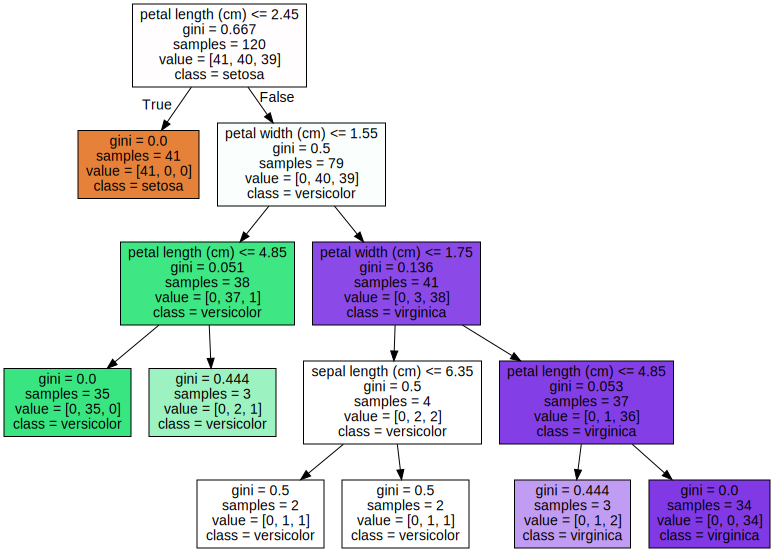

In [3]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.554 0.446]
sepal length (cm) : 0.000000
sepal width (cm) : 0.000000
petal length (cm) : 0.553879
petal width (cm) : 0.446121


<AxesSubplot:>

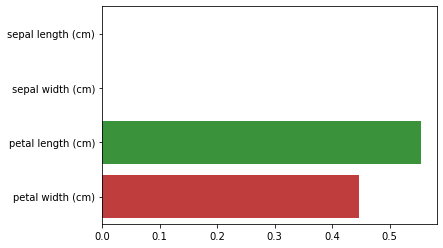

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

print('Feature importances:\n{}'.format(np.round(dt_clt.feature_importances_,3)))

for name, value in zip(iris_data.feature_names, dt_clt.feature_importances_):
    print('{} : {:3f}'.format(name,value))
    
sns.barplot(x=dt_clt.feature_importances_,y=iris_data.feature_names)



타이타닉 데이터를 decision tree를 이용해서 5개의 feature을 뽑아내고 
logisticregression으로 데이터를 8:2로 나누고 accuracy를 측정하라

In [5]:
import pandas as pd
import numpy as np
titanic_df = pd.read_csv('ad_train.csv')
titanic_df.drop('Unnamed: 0',axis=1,inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
titanic = titanic_df
X_titanic = titanic.drop('Survived',axis=1)
y_titanic = titanic['Survived']

dt_clf.fit(X_titanic,y_titanic)


DecisionTreeClassifier()

In [7]:
titanic_df = pd.DataFrame(X_titanic)
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [8]:
pd.DataFrame(data=dt_clf.feature_importances_.reshape(1,-1),columns=X_titanic.columns)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0849,0.306021,0.269829,0.042102,0.013934,0.22026,0.051022,0.011932


<AxesSubplot:>

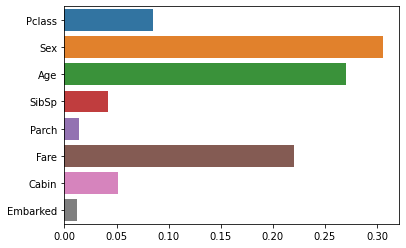

In [9]:
import seaborn as sns
    
sns.barplot(x=dt_clf.feature_importances_, y=X_titanic.columns)

In [10]:
titanic_df.drop(['Cabin','Embarked','Parch'],axis=1,inplace=True)
titanic_df

,Pclass,Sex,Age,SibSp,Fare
0,3,1,22.000000,1,7.2500
1,1,0,38.000000,1,71.2833
2,3,0,26.000000,0,7.9250
3,1,0,35.000000,1,53.1000
4,3,1,35.000000,0,8.0500
...,...,...,...,...,...
886,2,1,27.000000,0,13.0000
887,1,0,19.000000,0,30.0000
888,3,0,29.699118,1,23.4500
889,1,1,26.000000,0,30.0000


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X1 = titanic_df
X2 = titanic.drop('Survived',axis=1)
y = y_titanic = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state=11)

lr_clf_feat = LogisticRegression()
lr_clf_feat.fit(X_train,y_train)

pred = lr_clf_feat.predict(X_test)

accuracy_score(y_test,pred)
print('{:.3f}'.format(lr_clf_feat.score(X_test,y_test)))
print('{:.3f}'.format(accuracy_score(y_test,pred)))

0.832
0.832


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.2,random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)

pred = lr_clf.predict(X_test)

accuracy_score(y_test,pred)
print('{:.3f}'.format(lr_clf.score(X_test,y_test)))
print('{:.3f}'.format(accuracy_score(y_test,pred)))

0.849
0.849


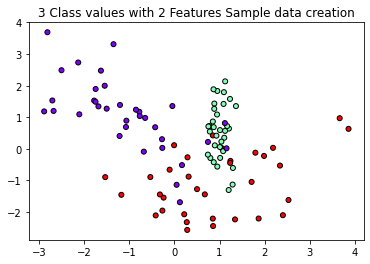

In [13]:
# 과적합 시각화: 데이터 모형
#-> sklearn에서 함수 형태로 제공되는 가상의 데이터 모델로 예시 작성

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 feature를 2개, 결정값의 클래스는 3가지 유형인 classification 샘플데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0,n_informative=2,
                                          n_classes=3, n_clusters_per_class=1,random_state=0)
#make_classification():
# 임의의 샘플 데이터 분류를 만드는 함수
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolor='k')

In [14]:
import numpy as np

def visualize_boundary(model,X,y):
    fig, ax = plt.subplots()
    
    ax.scatter(X[:,0],X[:,1],c=y,s=25,cmap='rainbow',edgecolor='k', clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    model.fit(X,y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end,num=200),np.linspace(ylim_start,ylim_end,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
                      
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3,
                          levels=np.arange(n_classes +1) - 0.5,
                          cmap='rainbow',clim=(y.min(),y.max()), zoder=1)

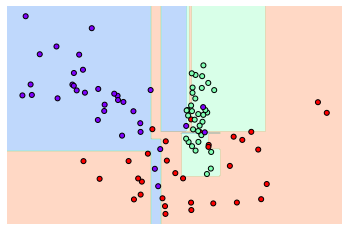

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

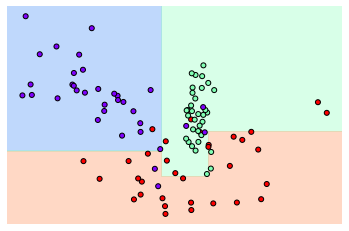

In [16]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

## 앙상블의 유형
보팅: 여러 예측 모델을 직접 해서 가장 적절한 모델을 선정하는 방식(hard voting)
      보팅 결과값의 평균화(soft voting)
<br>배깅: 복원추출 결과의 평균화
<br>부스팅: 순차적으로 모델을 적용하면서 약한 알고리즘에 가중치를 주어 다시 모델에 적용하는 알고리즘 유형

### 특징
단일 모델의 약점을 다수의 모델로 결합해서 보완 

In [17]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# 로지스틱, knn 모형을 만듬
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델로 소프트 보팅 기반 앙상블 모델로 분류기 구현
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting방식 정확도: {:.4f}'.format(vo_clf.score(X_test,y_test)))
print('Voting방식 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{} 정확도: {:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting방식 정확도: 0.9474
Voting방식 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


In [19]:
import pandas as pd

feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',header=None, names=['column_index','columns_name'])

feature_name_df

,column_index,columns_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [20]:
feature_dup_df = feature_name_df.groupby('columns_name').count()
feature_dup_df[feature_dup_df['column_index']>1].count()
feature_dup_df[feature_dup_df['column_index']>1].head()


,column_index
columns_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [21]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df 

In [22]:
import pandas as pd
def get_human_dataset():
    print(1)
    
    feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',header=None, names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    print(2)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    print(4)
    y_train = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None, names=['action'])
    
    print(5)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

1
2
4
5


In [23]:
print('학습 피처 데이터셋:')
print(X_train.info())

학습 피처 데이터셋:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [24]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [25]:
X_train.isna().sum().sum()

0

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시 동일한 예측 도출을 위한 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)

dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy1 = accuracy_score(y_test,pred)
accuracy2 = dt_clf.score(X_test,y_test)

print('결정 트리 예측 정확도: {:4f}'.format(accuracy1))
print('결정 트리 예측 정확도: {:4f}'.format(accuracy2))

print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.854768
결정 트리 예측 정확도: 0.854768
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1',cv=5, verbose=1)

grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:  nan
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 6}


In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df [['param_max_depth','mean_test_score']]

In [ ]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    print('max_depth = {} 정확도: {:.4f}'.format(depth,dt_clf.score(X_test,y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)

grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ',grid_cv.best_params_)


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정트리 예측 정확도: {:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df 

In [ ]:
import pandas as pd
def get_human_dataset():
    print(1)
    
    feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',header=None, names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    print(2)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    print(4)
    y_train = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./datasets/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None, names=['action'])
    
    print(5)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

print('randomforest 정확도:{:.4f}'.format(rf_clf.score(X_test,y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth = 10,min_samples_leaf = 8,min_samples_split = 8,random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print(accuracy_score(y_test,pred))
rf_clf1.score(X_test,y_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importance_values = rf_clf1.feature_importances_
ftr_importance = pd.Series(ftr_importance_values,index=X_train.columns)
ftr_top20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

### 부스팅 기법
</br>ada boost: 여러 알고리즘에 대해서 예측율이 떨어진 부분에 가중치를 부여를 해서 전체 알고리즘의 결과값을 합치는 방식의 기법
</br>gradient boosting: 모델 예측치에 대한 잔차에 대해서 반복적으로 분류기에 넣어서 오류를 줄이는 방식의 기법
<br>XGboost: gbm 방식 + 오차에 대한 정규화를 통해서 과적합 확률을 줄인 방식의 기법-> 이것은 sklearn에서 제공되지 않는다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time 
import warnings
warnings.filterwarnings('ignore')
import dsetmod.py as d

X_train, X_test, y_train, y_test = d.get_human_dataset()

start_time = time.time()

start_time